In [15]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import menzalib as mz

In [3]:
files=['RMS/qfactor/rms'+str(i)+'.txt' for i in range(1,11)]
print(files)
curves=[np.transpose(np.loadtxt(file,skiprows=4)) for file in files]

['RMS/qfactor/rms1.txt', 'RMS/qfactor/rms2.txt', 'RMS/qfactor/rms3.txt', 'RMS/qfactor/rms4.txt', 'RMS/qfactor/rms5.txt', 'RMS/qfactor/rms6.txt', 'RMS/qfactor/rms7.txt', 'RMS/qfactor/rms8.txt', 'RMS/qfactor/rms9.txt', 'RMS/qfactor/rms10.txt']


In [4]:
def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

def half_max_x(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, -half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(x, y, zero_crossings_i[0], half),
            lin_interp(x, y, zero_crossings_i[1], half)]

def std(x,y):
    dx=(x[-1]-x[1])/len(x)
    norm=np.sum(y)
    mean=0
    std=0
    for i in range(len(x)):
        mean=mean+y[i]*x[i]
    mean=mean/norm
    for i in range(len(x)):
        std=std+(x[i]-mean)**2*y[i]
    std=np.sqrt(std/norm)
    return std

In [24]:
STD=[]
FWMH=[]
Qfac=[]
AMP=[]
for i in range(len(curves)):
    freq,amp=curves[i]
    HMY=np.amax(amp)
    HMX=half_max_x(freq,amp)
    
    plt.plot(freq,amp)
    plt.ylabel('Amplitude[V]')
    plt.xlabel('Frequency[kHz]')
    plt.plot(HMX,[HMY/2,HMY/2])
    plt.savefig('RMS/immagini/'+str(i)+'.eps',format='eps')
    plt.close()
    
    AMP.append(HMY)
    STD.append(std(freq,amp))
    FWMH.append((HMX[1]-HMX[0]))
    Qfac.append(freq[np.argmax(amp)]/FWMH[i])

In [6]:
print(np.average(Qfac))
print(np.average(STD))
print(np.average(FWMH))

385.2958514116559
1.6167340347903696
0.48765431824789973


In [15]:
col1=mz.ns_tex(Qfac)
print(AMP)

[2.461, 2.599, 2.466, 2.514, 2.517, 2.549, 2.651, 2.68, 2.743, 2.512]


In [25]:
Amp=[2.061,2.107,1.993,1.972,2.086,2.098,2.137,2.182,1.998,2.080]
num=['1','2','3','4','5','6','7','8','9','10','Media']
FT=[1.9,1.93,1.98,2.02,2.05,2.11,2.14,2.18,1.98,1.79]
Amp.append(np.average(Amp))
FT.append(np.average(FT))

Amp=mz.ns_tex(Amp)
FT=mz.ns_tex(FT)
print(num)
a=np.average(Qfac)
Qfac.append(a)
Qfac=mz.ns_tex(Qfac)
print(Qfac)


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Media']
['$3.86 \\times 10^{2}$' '$3.85 \\times 10^{2}$' '$3.84 \\times 10^{2}$'
 '$3.86 \\times 10^{2}$' '$3.86 \\times 10^{2}$' '$3.85 \\times 10^{2}$'
 '$3.85 \\times 10^{2}$' '$3.84 \\times 10^{2}$' '$3.85 \\times 10^{2}$'
 '$3.87 \\times 10^{2}$' '$3.85 \\times 10^{2}$']


Copia tutto quello che c'è tra le linee

--------------------------
\begin{tabular}{ccc}
	\hline
	% Qua mettici il titolo, ricordati di mettere le \\ alla fine % 
	\hline
	1 & $2.06$ & $1.90$ \\
	2 & $2.11$ & $1.93$ \\
	3 & $1.99$ & $1.98$ \\
	4 & $1.97$ & $2.02$ \\
	5 & $2.09$ & $2.05$ \\
	6 & $2.10$ & $2.11$ \\
	7 & $2.14$ & $2.14$ \\
	8 & $2.18$ & $2.18$ \\
	9 & $2.00$ & $1.98$ \\
	10 & $2.08$ & $1.79$ \\
	Media & $2.07$ & $2.01$ \\
	\hline
\end{tabular}

--------------------------




In [26]:
Mat=[num,Amp,FT,Qfac]
mz.mat_tex(Mat)



Copia tutto quello che c'è tra le linee

--------------------------
\begin{tabular}{cccc}
	\hline
	% Qua mettici il titolo, ricordati di mettere le \\ alla fine % 
	\hline
	1 & $2.06$ & $1.90$ & $3.86 \times 10^{2}$ \\
	2 & $2.11$ & $1.93$ & $3.85 \times 10^{2}$ \\
	3 & $1.99$ & $1.98$ & $3.84 \times 10^{2}$ \\
	4 & $1.97$ & $2.02$ & $3.86 \times 10^{2}$ \\
	5 & $2.09$ & $2.05$ & $3.86 \times 10^{2}$ \\
	6 & $2.10$ & $2.11$ & $3.85 \times 10^{2}$ \\
	7 & $2.14$ & $2.14$ & $3.85 \times 10^{2}$ \\
	8 & $2.18$ & $2.18$ & $3.84 \times 10^{2}$ \\
	9 & $2.00$ & $1.98$ & $3.85 \times 10^{2}$ \\
	10 & $2.08$ & $1.79$ & $3.87 \times 10^{2}$ \\
	Media & $2.07$ & $2.01$ & $3.85 \times 10^{2}$ \\
	\hline
\end{tabular}

--------------------------




In [60]:
#finds the value of y for witch y=f(x) in couple of array x=[x_1,x_2,...,x_n] and y=[y_1,y_2,...,y_n]
def intersection(x,y,const):
    signs = np.sign(np.add(x, -const))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    return [lin_interp(y, x, zero_crossing,const) for zero_crossing in zero_crossings_i]


In [31]:
libera=np.transpose(np.loadtxt('shift/qfactor.txt',skiprows=4))
approach=np.transpose(np.loadtxt('shift/qfactorapproach.txt',skiprows=4))

In [61]:
#print(intersection(libera[0],libera[1],188))
freq_operazione=half_max_x(libera[0], libera[1])[0]
print(freq_operazione)


[2.039799999999974]
187.48956756756755


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


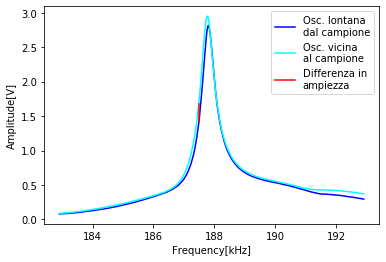

In [86]:
plt.plot(libera[0],libera[1],label='Osc. lontana\ndal campione',color='blue')
plt.plot(approach[0],approach[1],label='Osc. vicina\nal campione',color='cyan')
x=[freq_operazione,freq_operazione]
y=[intersection(approach[0],approach[1],freq_operazione)[0],
   intersection(libera[0],libera[1],freq_operazione)[0]]
plt.plot(x,y,label='Differenza in \nampiezza',color='red')
plt.ylabel('Amplitude[V]')
plt.xlabel('Frequency[kHz]')
plt.legend()
plt.savefig('shift.eps',format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


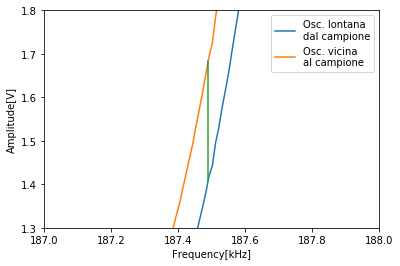

In [83]:
plt.plot(libera[0],libera[1],label='Osc. lontana\ndal campione')
plt.plot(approach[0],approach[1],label='Osc. vicina\nal campione')
x=[freq_operazione,freq_operazione]
y=[intersection(approach[0],approach[1],freq_operazione)[0],
   intersection(libera[0],libera[1],freq_operazione)[0]]
plt.plot(x,y)
plt.ylabel('Amplitude[V]')
plt.xlabel('Frequency[kHz]')
plt.xlim(187,188)
plt.ylim(1.3,1.8)
plt.legend()
plt.savefig('zoom_shift.eps',format='eps')

In [72]:
print(y[0]-y[1])

0.2744594594594565


In [104]:
a=1/4
b=1

def lin(x,a,b): return a*x+b

def rot(x,y,t):
    RotMat=[[np.cos(t),-np.sin(t)],
            [np.sin(t),np.cos(t)]]
    return np.dot(RotMat,[x,y])
    

def gradini(n,l,h):
    x=[]
    y=[]
    for i in range(n):
        x.append(i*l)
        x.append(i*l)
        if(i%2==0):
            y.append(0)
            y.append(h)
        else:
            y.append(h)
            y.append(0)
    return [x,y]
    

In [184]:
grad=gradini(7,1,1/2)
t=np.pi/16
rot_grad=[]
for i in range(len(grad[0])):
    x,y=grad[0][i],grad[1][i]
    x,y=rot(x,y,t)
    rot_grad.append([x,y])
rot_grad=np.transpose(rot_grad)
for i in range(len(rot_grad[0])-1):
    if rot_grad[0][i]>rot_grad[0][i+1] and grad[1][i]==0 and grad[1][i+1]!=0:
        print(proj_grad[0][i])
        rot_grad[0][i]=rot_grad[0][i+1]
proj_grad=[rot_grad[0],grad[1]]

-0.09754516100806412
1.8640253997983967
3.8255959606048577
5.787166521411319


In [185]:
print(proj_grad)

[array([-0.09754516, -0.09754516,  0.88324012,  0.98078528,  1.8640254 ,
        1.8640254 ,  2.84481068,  2.94235584,  3.82559596,  3.82559596,
        4.80638124,  4.9039264 ,  5.78716652,  5.78716652]), [0, 0.5, 0.5, 0, 0, 0.5, 0.5, 0, 0, 0.5, 0.5, 0, 0, 0.5]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


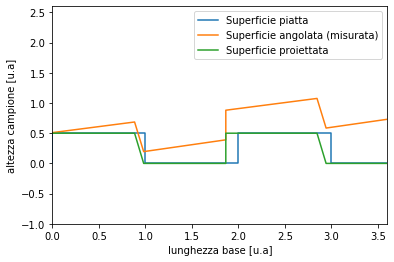

In [187]:
plt.plot(*grad,label='Superficie piatta')
plt.plot(*rot_grad,label='Superficie angolata (misurata)')
plt.plot(*proj_grad,label='Superficie proiettata')
plt.xlim(0.0,3.6)
plt.ylim(-1.,2.6)
plt.legend()
plt.xlabel('lunghezza base [u.a]')
plt.ylabel('altezza campione [u.a]')
plt.savefig('rimozione_rotazione.eps',format='eps')

In [143]:
proj_grad=[rot_grad[0],grad[1]]